The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [290]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

**Load the dataset and find the most common gender and birth country**

In [291]:
nobel_df = pd.read_csv("data/nobel.csv")
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [292]:
nobel_df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


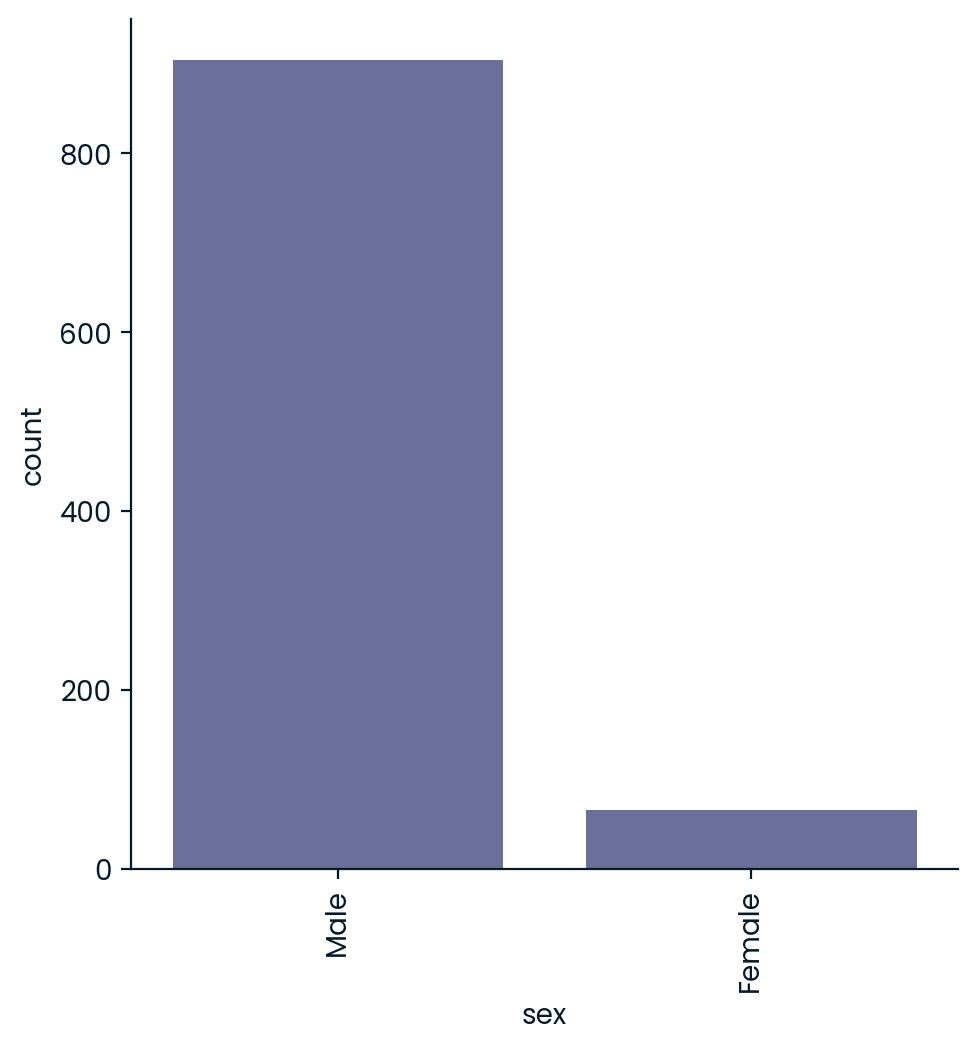

In [293]:
sns.catplot(x = "sex", data = nobel_df, kind = "count")
plt.xticks(rotation = 90)
plt.show()
top_gender = "Male"

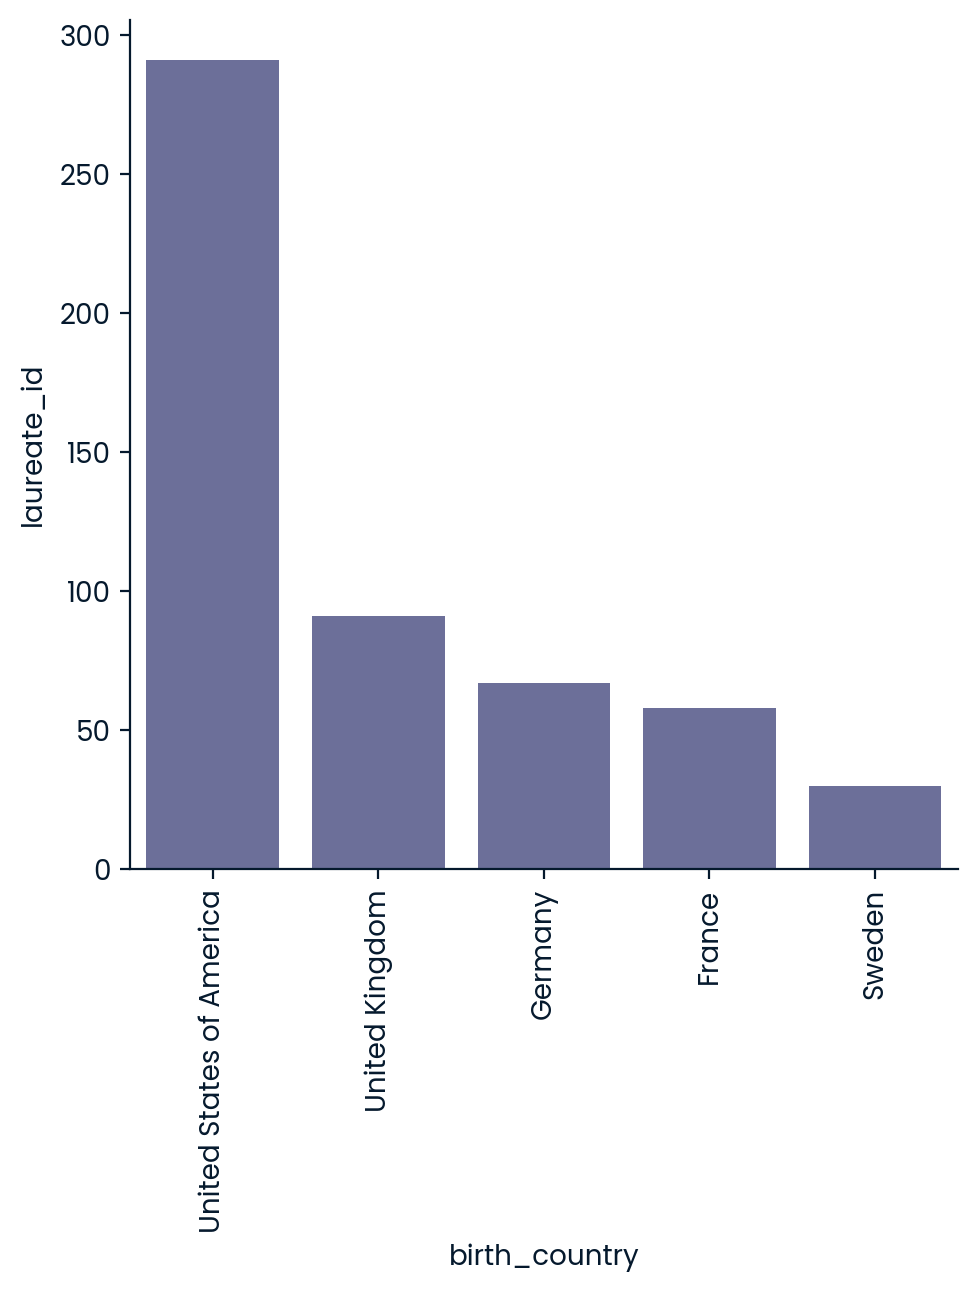

In [294]:
top_countries = nobel_df[["laureate_id", "birth_country"]].groupby("birth_country").count()
top_countries = top_countries.sort_values("laureate_id", ascending = False).iloc[:5]
sns.catplot(x = "birth_country", y = "laureate_id", data = top_countries, kind = "bar")
plt.xticks(rotation = 90)
plt.show()
top_country = "United States of America"

**Identify the decade with the highest ratio of US-born winners**

create a column that creates a flag for winners whose birth country is "United States of America"

In [295]:
nobel_df['US_born'] = nobel_df['birth_country'] == "United States of America"
nobel_df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,US_born
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False


create a decade column

In [296]:
nobel_df['decade'] = (np.floor(nobel_df['year'] / 10) * 10).astype('int64')
nobel_df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,US_born,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900


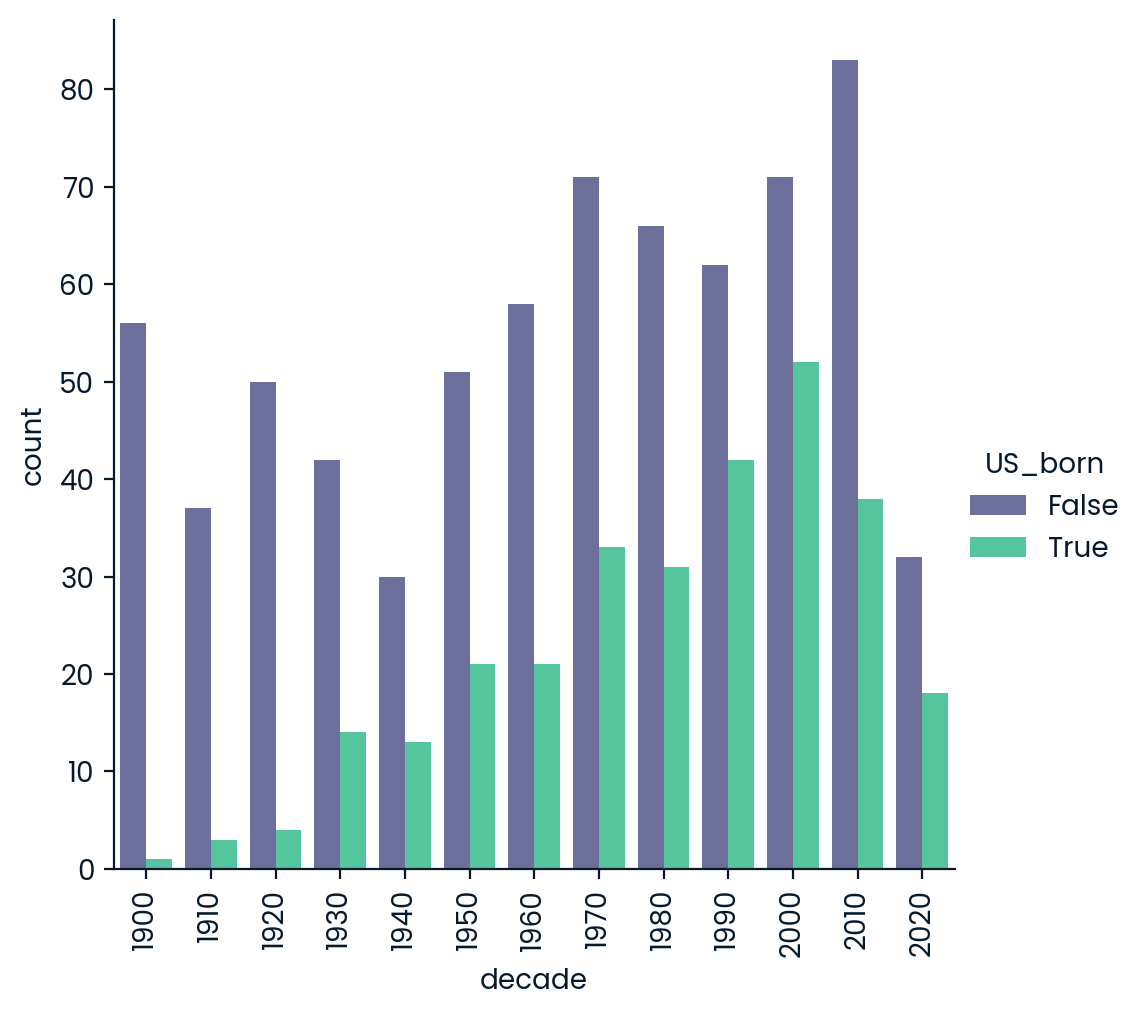

In [297]:
sns.catplot(x = 'decade', data = nobel_df, kind = "count", hue="US_born")
plt.xticks(rotation = 90)
plt.show()

Use groupby() to group by decade, then use .mean() on the US-born winner column.

In [298]:
nobel_decade_ratio_by_US_born = nobel_df[['US_born', "decade"]].groupby("decade", as_index=False).mean()
print(type(nobel_decade_ratio_by_US_born))
max_decade_usa = nobel_decade_ratio_by_US_born[nobel_decade_ratio_by_US_born['US_born'] == nobel_decade_ratio_by_US_born['US_born'].max()]['decade'].astype('int64')
max_decade_usa = max_decade_usa.iloc[0]
max_decade_usa

<class 'pandas.core.frame.DataFrame'>


2000

In [299]:
nobel_decade_ratio_by_US_born

,decade,US_born
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


Create a relational line plot

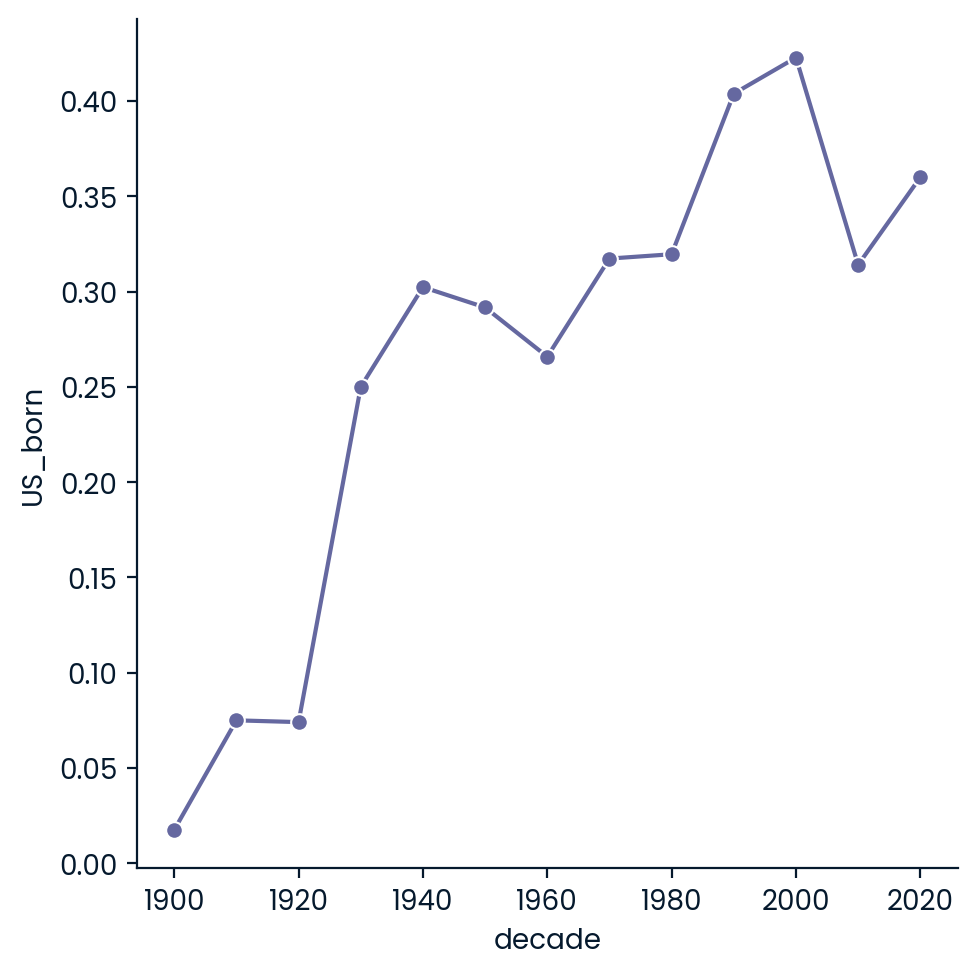

In [300]:
sns.relplot(x = "decade", y = "US_born", data = nobel_decade_ratio_by_US_born, kind = "line", marker="o")
plt.show()

**Find the decade and category with the highest proportion of female laureates**

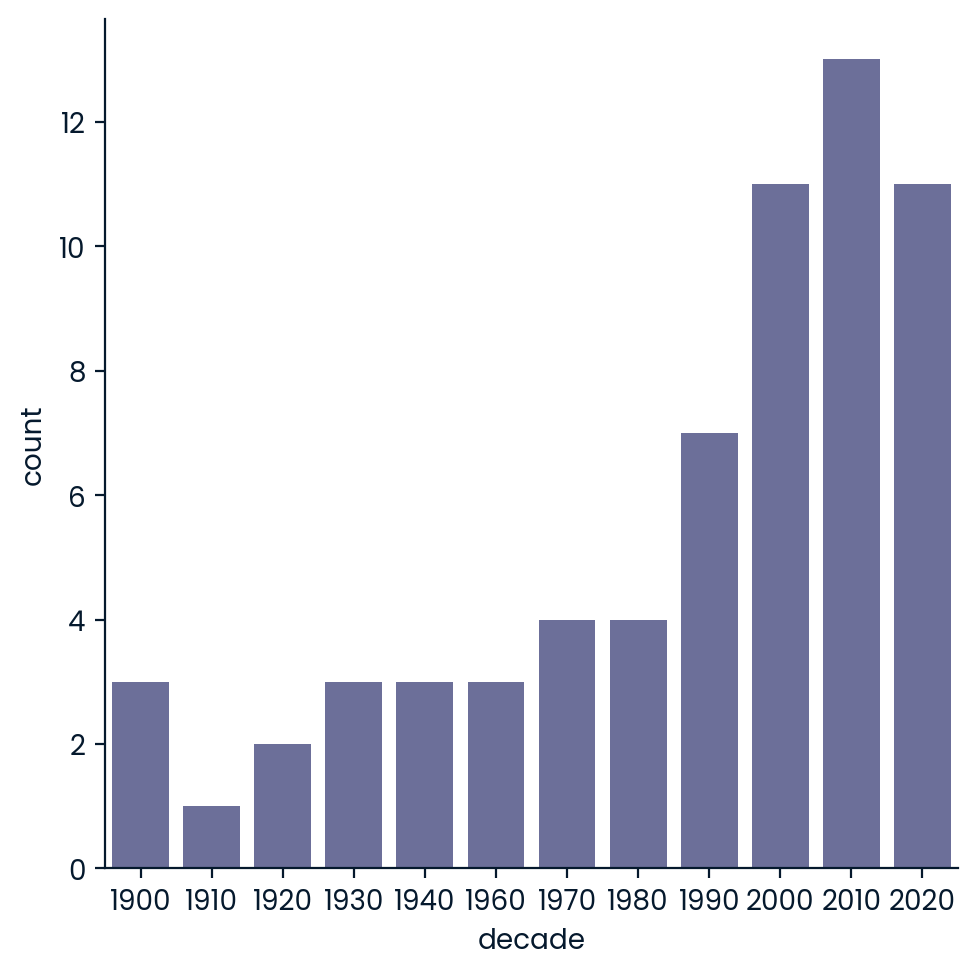

    decade    category  count
0     1900  Literature      1
1     1900       Peace      1
2     1900     Physics      1
3     1910   Chemistry      1
4     1920  Literature      2
5     1930   Chemistry      1
6     1930  Literature      1
7     1930       Peace      1
8     1940  Literature      1
9     1940    Medicine      1
10    1940       Peace      1
11    1960   Chemistry      1
12    1960  Literature      1
13    1960     Physics      1
14    1970    Medicine      1
15    1970       Peace      3
16    1980    Medicine      3
17    1980       Peace      1
18    1990  Literature      3
19    1990    Medicine      1
20    1990       Peace      3
21    2000   Chemistry      1
22    2000   Economics      1
23    2000  Literature      3
24    2000    Medicine      4
25    2000       Peace      2
26    2010   Chemistry      1
27    2010   Economics      1
28    2010  Literature      3
29    2010    Medicine      2
30    2010       Peace      5
31    2010     Physics      1
32    2020

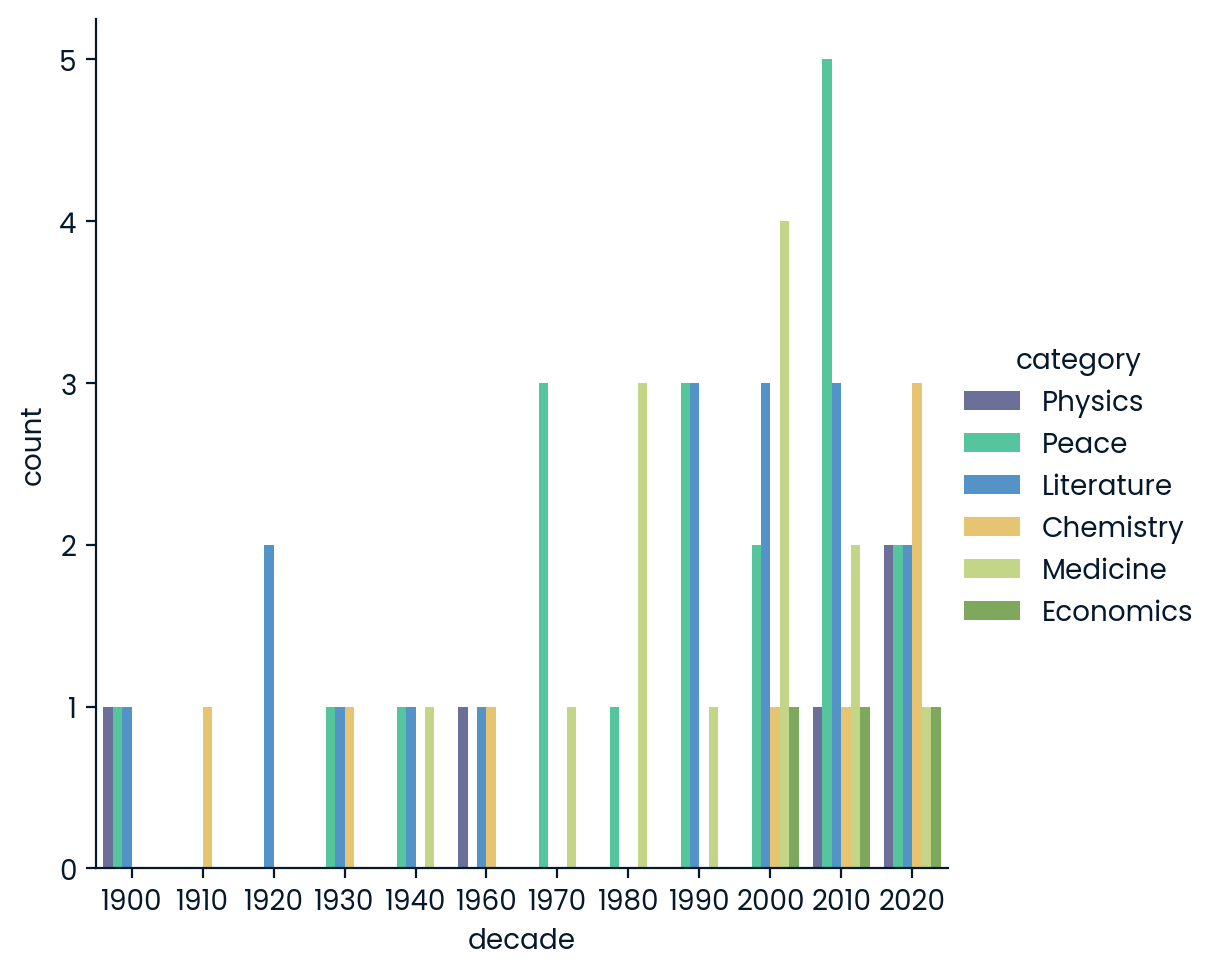

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming nobel_df is already defined and loaded

# Plotting the count of female Nobel laureates by decade
sns.catplot(x="decade", data=nobel_df[nobel_df['sex'] == 'Female'], kind="count")
plt.show()

# Filtering the DataFrame for female Nobel laureates
female_nobel = nobel_df[nobel_df['sex'] == 'Female']

# Grouping by 'decade' and 'category' and counting the occurrences
grouped_female_by_decade_category = female_nobel.groupby(['decade', 'category']).size().reset_index(name='count')
print(grouped_female_by_decade_category)

grouped_female_by_category_mean = grouped_female_by_decade_category.groupby('category').mean()
print(grouped_female_by_category_mean)

grouped_female_by_decade_mean = grouped_female_by_decade_category.groupby('decade').mean()
print(grouped_female_by_decade_mean)

# Finding the decade and category with the maximum female winners
max_femal_winners_decade_category = grouped_female_by_decade_category.loc[grouped_female_by_decade_category['count'].idxmax()]
max_femal_winners_decade_category

sns.catplot(x="decade", data=nobel_df[nobel_df['sex'] == 'Female'], hue='category', kind="count")
plt.show()

In [302]:
grouped_female_by_decade_category

,decade,category,count
0,1900,Literature,1
1,1900,Peace,1
2,1900,Physics,1
3,1910,Chemistry,1
4,1920,Literature,2
5,1930,Chemistry,1
6,1930,Literature,1
7,1930,Peace,1
8,1940,Literature,1
9,1940,Medicine,1


In [303]:
max_female_dict = {
    2020 : "Literature"
}

**Who was the first woman to receive a Nobel Prize, and in what category?**

In [304]:
women_nobel_df = nobel_df[nobel_df['sex'] == 'Female']
first_woman = women_nobel_df[women_nobel_df['year'] == women_nobel_df['year'].min()]
first_woman_name = first_woman["full_name"].iloc[0]
first_woman_category = first_woman['category'].iloc[0]
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


**Which individuals or organizations have won more than one Nobel Prize throughout the years?**

In [305]:
repeat_count = nobel_df['full_name'].value_counts()
repeat_count
repeat_count_more_than_once = repeat_count[repeat_count > 1]
repeat_count_more_than_once
repeat_list = list(repeat_count_more_than_once.index)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']